# Python для анализа данных

*Татьяна Рогович, НИУ ВШЭ*

## Описательные статистики в Pandas 

Pandas - библиотека для работы с табличными данными в питоне.
* Документация: https://pandas.pydata.org/
* 10 minutes intro: https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
* Pandas Cheat-Sheet: https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

In [2]:
import pandas as pd # импортировали библиотеку pandas и назвали ее pd 

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/aaparshina/DDC_22-23_basics_python/main/data/titanic.csv')

Для количественных данных удобнее смотреть минимальные/максимальные/средние значения:

In [4]:
print(data['Age'].min()) 
print(data['Age'].max()) 
print(data['Age'].mean())

0.42
80.0
29.69911764705882


В Pandas есть функция `.describe()`, которая делает удобную сводную таблицу по всем количественным столбцам сразу (обратите внимание, что для Pandas количественные данные = все, что представлено числами, что, разумеется, неверно в общем случае):

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data[['Age', 'Fare']].describe() # также можно применять только к отдельным колонкам

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


Данные можно группировать:

In [15]:
data.groupby('Sex') # разбиение всех объектов на 2 группы по полу - возращает просто сгруппированый датафрейм

In [16]:
data.groupby('Sex')['Pclass'].value_counts() # группируем по полу и считаем для каждого пассажирова разных классов

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [17]:
data.groupby('Sex')['Age'].mean() # средний возраст для пассажиров каждого из полов

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

Смотреть на числа и таблицы не очень удобно - построим графики!

In [18]:
# это библиотека matplotlib для отрисовки графиков, мы поговорим о ней подробнее на семинаре 4  :)
# со знака процента начинаются магические функции - эта позволяет нам строить графики прямо в блокноте (inline)
%matplotlib inline 

<AxesSubplot:>

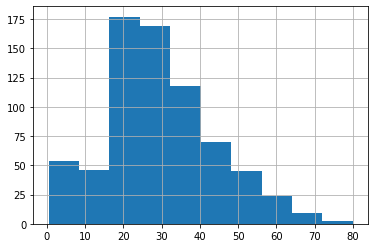

In [20]:
data['Age'].hist() # гистограмма распределения возраста среди пассажиров

<AxesSubplot:>

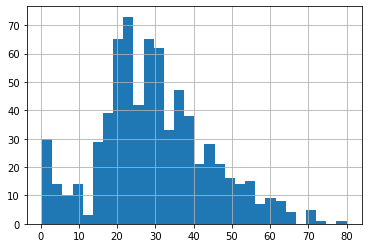

In [21]:
data['Age'].hist(bins = 30) # увеличили кол-во столбцов (бинов)

<AxesSubplot:>

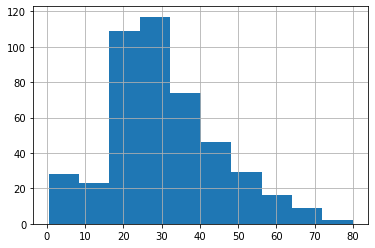

In [22]:
data[data.Sex == 'male']['Age'].hist()  #гистограмма распределения возраста среди мужчин

Построим столбчатую диаграмму для признака "класс пассажира":

1) Сгруппируем все данные по признаку `Pclass` - `data.groupby('Pclass')` и посчитаем количество в каждой из групп - `.size()`

In [23]:
data.groupby('Pclass').size() 

Pclass
1    216
2    184
3    491
dtype: int64

2) На полученных данных построим диаграмму:

<AxesSubplot:xlabel='Pclass'>

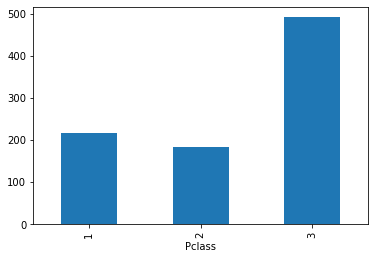

In [24]:
data.groupby('Pclass').size().plot(kind = 'bar')

<AxesSubplot:title={'center':'Passenger classes'}, ylabel='None'>

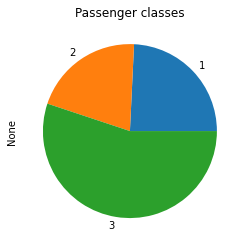

In [25]:
data.groupby('Pclass').size().plot(kind = 'pie', title = 'Passenger classes')

<AxesSubplot:xlabel='Embarked'>

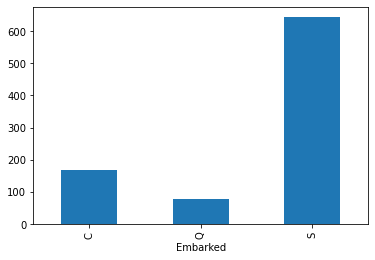

In [26]:
data.groupby('Embarked').size().plot(kind = 'bar')

Можно делать и чуть более сложные графики. Давйте посмотрим на распределение выживших среди мужчин и женщин.

<AxesSubplot:xlabel='Survived,Sex'>

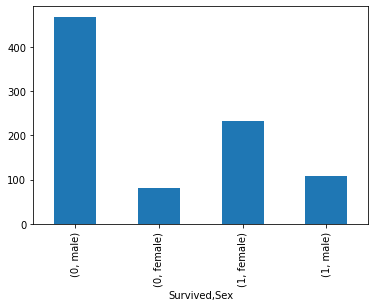

In [27]:
data.groupby(['Survived'])['Sex'].value_counts().plot(kind = 'bar')

Так мы видим разбивку, но хотелось бы получить составные столбики. Для этого выполним метод `.unstack()`, который преобразует датафрейм.

In [28]:
data.groupby(['Survived'])['Sex'].value_counts() # без unstack

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [29]:
data.groupby(['Survived'])['Sex'].value_counts().unstack() 
# с unstack. Обратите внимание, как изменилась структура датафрема.

Sex,female,male
Survived,,
0,81,468
1,233,109


А вот его мы уже можем визуализировать. 

<AxesSubplot:xlabel='Survived'>

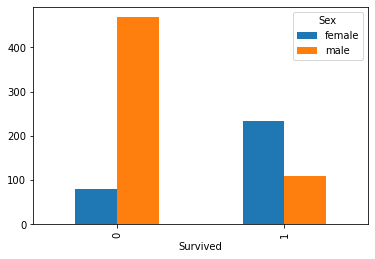

In [30]:
data.groupby(['Survived'])['Sex'].value_counts().unstack().plot(kind = 'bar')

Уже лучше. А еще можно добавить дополнительный параметр в метод `.plot()` и станет совсем хорошо.

<AxesSubplot:xlabel='Survived'>

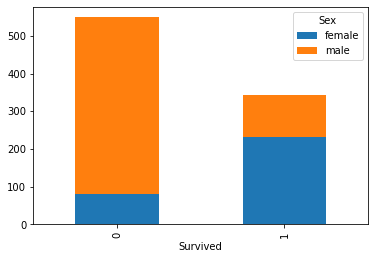

In [31]:
data.groupby(['Survived'])['Sex'].value_counts().unstack().plot(kind='bar', stacked = True)

## Описательные статистики в Python


**Описательная статистика на Python: количественные и качественные данные**

Описательная статистика или дескриптивная статистика (*англ.* descriptive statistics) занимается обработкой эмпирических данных, их систематизацией, наглядным представлением в форме графиков и таблиц, а также их количественным описанием посредством  статистических показателей.

Для начала разберемся с несколькими важными определениями:

**Распределение**

Случайная величина — это переменная, значения которой представляют собой исходы какого-нибудь случайного феномена или эксперимента. Простыми словами: это численное выражение результата случайного события. Случайная величина является одним из основных понятий теории вероятностей.

Распределение вероятностей — это закон, описывающий область значений случайной величины и вероятности их исхода (появления).

Чтобы чуть лучше понять, что же такое распределение, давайте посмотрим на гистограмму признака "Age".

**Гистограмма**

Гистограмма представляет собой столбчатую диаграмму.

При построении гистограммы множество значений признака разбивается на $k$ интервалов,
эти интервалы становятся основаниями столбцов. Высоты стобцов пропорциональны количеству (частоте) значений признака, попадающих в 
соответствующий интервал.

<AxesSubplot:>

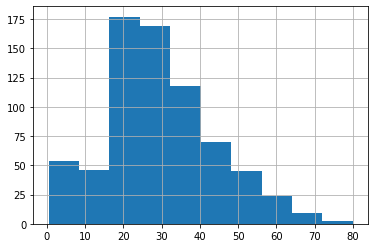

In [32]:
data['Age'].hist()

Обычно, когда говорят о распределении, представляют сглаженную линию, под которой могли бы находиться все наши данные. Такой график уже показывает нам не сколько раз встречается каждое значение, а какую долю распределения такие значения составляют.
Давайте импортируем библиотеку для визуализаций seaborn (о ней поговорим подробнее в следующий раз), которая поможет нам построить такой график.

/Users/anastasiaparsina/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

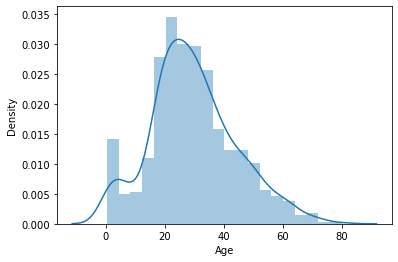

In [34]:
import seaborn as sns  # импортируем библиотеку под именем sns

sns.distplot(data['Age'].dropna())  # применяем функцию, которая строит график распределения из библиотеки seaborn к нашим данным. 
                                 # методом .dropna() опускаем ячейки с пропущенными значениями - иначе seaborn сломается.

В идеальном мире многие вещи распределены нормально (например, вес и рост людей). Это значит, что такое распределение имеет определенные параметры (не будем их обсуждать в этом курсе) и выглядит как колокол (а вот это можно и запомнить). 

Для некоторых моделей в статистике мы можем применять только переменные, которые распределены нормально. Давайте посмотрим, как распределен возраст пассажиров относительно нормального распределения. Для этого импортируем функцию, которая задает нормальное распределение.

C:\Users\rogov\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


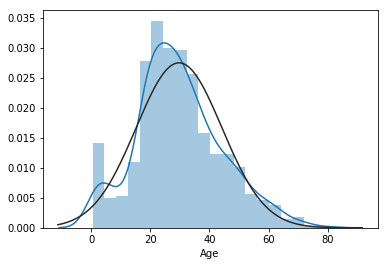

In [56]:
# из пакета для работы со статистическими данными и моделями импортируем команду, которая задает нормальное распределение
from scipy.stats import norm

sns.distplot(data.Age.dropna(), fit=norm)  # параметр fit строит нам еще один график поверх существующего, 
                                           # сейчас мы просим его построить нормальное распределение 

**Меры центральной тенденции**

Меры среднего уровня дают усредненную характеристику совокупности объектов по определенному признаку.

В зависимости от типа шкалы измерения применяются следующие меры среднего уровня:
- для количественных данных - среднее значение (арифметическое среднее), медиана, мода

- для категориальных:

   для порядковых данных - медиана, мода

   для номинальных данных - мода

На самом деле таких мер довольно много, например: взвешенное среднее — среднее значение, учитывающее весовые коэффициенты для каждого значения, гармоническое среднее — количество наблюдений, деленное на сумму инвертированных значений наблюдений, и так далее.

**Среднее значение (математическое ожидание)**

*Математическое ожидание* вычисляется по формуле:

$$
 {\displaystyle {\bar {x}}={\frac {1}{n}}\sum _{i=1}^{n}x_{i}={\frac {1}{n}}(x_{1}+\ldots +x_{n})} 
 $$

In [37]:
data['Age'].mean()

29.69911764705882

**Немного усложним задачу**

In [60]:
data[['Pclass', 'Age']].groupby('Pclass').mean()

,Age
Pclass,
1,38.233441
2,29.877630
3,25.140620


**Медиана**

Если $x_1, x_2, ..., x_n$ – упорядоченные по возрастанию или убыванию числовые значения рассматриваемого признака, 
$n$ – объем выборки, то *медиана* - это средний элемент для нечетного  $n$ и полуcумма средних элементов для четного  $n$.

Для порядковой шкалы медиана является такой точкой на шкале, которая делит всю совокупность опрошенных на две равных части — тех, кто отметил градации меньше этой точки (либо равные ей), и тех, кто отметил градации больше этой точки.


In [38]:
data['Age'].median()

28.0

**Мода**

Мода - значение во множестве наблюдений, которое встречается наиболее часто.

In [39]:
data.Pclass.mode()

0    3
Name: Pclass, dtype: int64

In [40]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**Квантили**

Квантиль - значение, которое заданная случайная величина не превышает с фиксированной вероятностью. Если вероятность задана в процентах, то квантиль называется процентилем или перцентилем.

Например, фраза «для развитых стран 99-процентиль продолжительности жизни составляет 100 лет» означает, что ожидается, что 99 % людей проживут не более, чем 100 лет.

Относительно нашего датасета фраза "75%-перцентиль возраста пассажиров Титаника равна 38 лет" означает, что 75% пассажиров были не старше 38 лет.


In [67]:
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

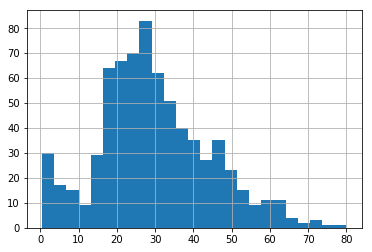

In [68]:
data.Age.hist(bins=25)

In [65]:
q1 = data['Age'].quantile(0.25)
q3 = data['Age'].quantile(0.75)
iqr = q3 - q1
print(q1, q3, iqr)

20.125 38.0 17.875


In [66]:
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr
iqr_outlier_threshold_up = q3 + 1.5 * iqr
print(iqr_outlier_threshold_bottom)
print(iqr_outlier_threshold_up)

-6.6875
64.8125


In [70]:
data.iloc[0]['Age']

22.0

In [71]:
for i in data.index:
    if data.iloc[i]['Age'] > iqr_outlier_threshold_up:
        print(data.iloc[i]['Age'], data.iloc[i]['Sex'])

66.0 male
65.0 male
71.0 male
70.5 male
65.0 male
65.0 male
71.0 male
80.0 male
70.0 male
70.0 male
74.0 male


<AxesSubplot:xlabel='Age', ylabel='Sex'>

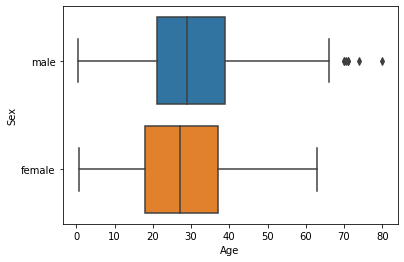

In [63]:
sns.boxplot(x=data['Age'], y=data['Sex'])

**Описание массива нечисловых данных**

В качестве базовой описательной статистики для категориальных признаков можно использовать следующий набор характеристик:

- количество уникальных представителей массива

- частоты встречаемости этих представителей

- наиболее часто встречающиеся представители (мода распределения)

- наиболее редко встречающиеся представители

In [69]:
data.Pclass.unique()

array([3, 1, 2], dtype=int64)

In [70]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [71]:
data.Pclass.mode()

0    3
dtype: int64

## И еще чуть-чуть! Работа с пропущенными значениями.

Если вы помните, то переменная Age содержит пропущенные значения. Давайте посмотрим информацию об этой колонке.


In [41]:
data[['Age']].info()  # обратите внимание - двойные скобки. Так pandas нам вернет датафрейм из одной колонки, а не список.
                      # А метод info() работает только с датафреймом


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [42]:
type(data['Age'])  # вот так - объект подобный списку (Series)

pandas.core.series.Series

In [43]:
type(data[['Age']])  # а вот так - датафрейм

pandas.core.frame.DataFrame

Вернемся к info(). Мы видим, что из 891 наблюдения у нас только 714 ненулевых значений. Значит, у этих пассажиров возраст неизвестен. Ваши идеи, что можно с этим сделать?

Есть разные варианты того, что делать с пропущенными значениями - от "не делать ничего и выкинуть их" до "давайте предскажем их значения с помощью нейронки". Почитать можно здесь: 

https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779

Мы с вами попробуем сделать второй по сложности вариант (после не делать ничего) и заменить их средним значением (средним или медианой). Для категориальных данных можно заполнять пропущенные значения модой.

Пропущенные значения могут быть закодированы по-разному - 0, 'No response', '999'. В итоге мы их всегда хотим привести к объекту NaN (not a number), с которым могут работать методы pandas. 


In [44]:
print(data.loc[5, 'Age'])
print(type(data.loc[5, 'Age']))

nan
<class 'numpy.float64'>


In [45]:
data[data['Age'].isnull()].head() # выводим значения датафрейма, в которых отсутствует возраст
                                  # Они возращают True методу .isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [46]:
data['Age'].median() # вспомним какая у нас медиана

28.0

In [47]:
data['Age_Median'] = data['Age'].fillna(data['Age'].median())  # сохраняю результат заполнения в новую колонку

In [48]:
data[data['Age'].isnull()].head()  # смотрим, что произошло с возрастом в новой колонке у тех, у кого он отсутсвовал

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Median
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,28.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,28.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,28.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,28.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,28.0


In [49]:
data.head() # А у всех остальных - их нормальный возраст.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


Такой метод один из самых топорных, но сойдет для первого знакомства или черновика анализа в серьезном исследовании. Давайте попробуем теперь немного улучшить его. Посмотрим, как отличается медианный возраст для мужчин и женщин.

In [50]:
data.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

Разница два года! Было бы логично в наших данных заполнять недостающие значения по полу.

In [51]:
data["Age_Median_Sex"] = data["Age"].fillna(data.groupby('Sex')["Age"].transform('median'))

In [52]:
data[data['Age'].isnull()].head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Median,Age_Median_Sex
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,28.0,29.0
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,28.0,29.0
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,28.0,27.0
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,28.0,29.0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,28.0,27.0


In [54]:
data.head() # Опять проверяем, что это все применилось только к нужным людям

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Median,Age_Median_Sex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,35.0


Разберем как работает предыдущий кусок кода

In [55]:
# эта функция возвращает нам колонку возраст, где все значения заменены медианой по условию пола
# data.groupby('Sex') - группирует наши значения по полу
# ['Age'] - колонка, с которой работаем
# transform('median') - высчитывает медианный возраст для каждого пола и подставляет ее вместо значения
data.groupby('Sex')['Age'].transform('median').head()

0    29.0
1    27.0
2    27.0
3    27.0
4    29.0
Name: Age, dtype: float64

In [56]:
# когда передаем это все как аргумент методу .fillna - 
# заполнение по медиане работает только для отсутвтующих значений.
data["Age"].fillna(data.groupby('Sex')["Age"].transform('median')).head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    29.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

**Заполнение по моде для категориальных переменных**

Тоже самое (почти!) работает и для категориальных переменных.

In [57]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Median,Age_Median_Sex
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,38.0,38.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,62.0,62.0


Давайте посмотрим, что возвращает нам функция мода - не число, как например median или mean, а список. 

In [58]:
data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

Чтобы передать ее результат методу fillna, нам нужно "вытащить" значение из него (а это мы умеем делать - оно лежит под нулевым индексом.


In [59]:
data['Embarked'].mode()[0]

'S'

In [60]:
# применяем
data["Embarked_Mode"] = data["Embarked"].fillna(data['Embarked'].mode()[0])

In [61]:
# проверяем
data.loc[61]

PassengerId                        62
Survived                            1
Pclass                              1
Name              Icard, Miss. Amelie
Sex                            female
Age                              38.0
SibSp                               0
Parch                               0
Ticket                         113572
Fare                             80.0
Cabin                             B28
Embarked                          NaN
Age_Median                       38.0
Age_Median_Sex                   38.0
Embarked_Mode                       S
Name: 61, dtype: object